## Msc Big Data & Finance
### Session 2

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as pdr


In [10]:
!pip install pandas-datareader==0.9.0

### Reading files

In [11]:
btc=pd.read_csv('BTC-USD.csv', sep=",", index_col="Date")
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [12]:
file="BTC-USD.xlsx"
sheet="Sheet1"

xl=pd.ExcelFile(file)
btc_xl=xl.parse(sheet, index_col="Date")

btc_xl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [13]:
btc.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Missing data

In [14]:
from random import gauss, seed

In [15]:
seed(100)
dates=pd.date_range("2023-01-01", periods=5, freq="D")
close=pd.Series((gauss(0,20),gauss(0,20),gauss(0,20),np.nan, gauss(0,20)), index=dates)
close

2023-01-01    13.431067
2023-01-02    17.466393
2023-01-03     4.072331
2023-01-04          NaN
2023-01-05   -31.006984
Freq: D, dtype: float64

In [16]:
close.fillna(0)

2023-01-01    13.431067
2023-01-02    17.466393
2023-01-03     4.072331
2023-01-04     0.000000
2023-01-05   -31.006984
Freq: D, dtype: float64

In [17]:
close.fillna(close.mean())

2023-01-01    13.431067
2023-01-02    17.466393
2023-01-03     4.072331
2023-01-04     0.990702
2023-01-05   -31.006984
Freq: D, dtype: float64

In [18]:
close.fillna(method="ffill") #forwardfill

2023-01-01    13.431067
2023-01-02    17.466393
2023-01-03     4.072331
2023-01-04     4.072331
2023-01-05   -31.006984
Freq: D, dtype: float64

In [19]:
close.fillna(method="bfill") #backwardfill

2023-01-01    13.431067
2023-01-02    17.466393
2023-01-03     4.072331
2023-01-04   -31.006984
2023-01-05   -31.006984
Freq: D, dtype: float64

### Concatenate & merge

In [20]:
stocks1=pd.DataFrame({'Stock':['Stock A', 'Stock B','Stock C'],
                     'Return 2020':[0.5,1.2,2.4],
                     'Return 2021':[1.7,2.2,-1.9]})

stocks2=pd.DataFrame({'Stock':['Stock D', 'Stock E','Stock F'],
                     'Return 2021':[0.1,0.7,1.2],
                     'Return 2022':[2.1,5.1,2.6]})

stocks1



,Stock,Return 2020,Return 2021
0,Stock A,0.5,1.7
1,Stock B,1.2,2.2
2,Stock C,2.4,-1.9


In [21]:
stocks1=stocks1.set_index('Stock')
stocks1

,Return 2020,Return 2021
Stock,,
Stock A,0.5,1.7
Stock B,1.2,2.2
Stock C,2.4,-1.9


In [22]:
stocks2=stocks2.set_index('Stock')
stocks2

,Return 2021,Return 2022
Stock,,
Stock D,0.1,2.1
Stock E,0.7,5.1
Stock F,1.2,2.6


In [23]:
pd.concat([stocks1,stocks2], join='inner')

,Return 2021
Stock,
Stock A,1.7
Stock B,2.2
Stock C,-1.9
Stock D,0.1
Stock E,0.7
Stock F,1.2


In [24]:
sectors=pd.DataFrame({'Stock':['Stock A', 'Stock B','Stock C','Stock D', 'Stock E','Stock F'],
                     'Sectors':['Oil & Gas','Financials','Utilities','Tech','Consumer','Pharma']})
sectors

,Stock,Sectors
0,Stock A,Oil & Gas
1,Stock B,Financials
2,Stock C,Utilities
3,Stock D,Tech
4,Stock E,Consumer
5,Stock F,Pharma


In [25]:

stocks2.merge(sectors, on="Stock")

,Stock,Return 2021,Return 2022,Sectors
0,Stock D,0.1,2.1,Tech
1,Stock E,0.7,5.1,Consumer
2,Stock F,1.2,2.6,Pharma


In [26]:
import yfinance as yf
yf.pdr_override()

startdate=dt(2019,1,1)
enddate=dt(2022,12,31)

tesla=pdr.get_data_yahoo('TSLA', start='2019-01-01', end='2022-12-31')
tesla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,22.519333,22.614000,21.684000,22.186666,22.186666,94534500
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000


In [27]:
tesla['Close'].resample('M').last() #You can use M, Q, Y as frequency

Date
2018-12-31     22.186666
2019-01-31     20.468000
2019-02-28     21.325333
2019-03-31     18.657333
2019-04-30     15.912667
2019-05-31     12.344000
2019-06-30     14.897333
2019-07-31     16.107332
2019-08-31     15.040667
2019-09-30     16.058001
2019-10-31     20.994667
2019-11-30     21.996000
2019-12-31     27.888666
2020-01-31     43.371334
2020-02-29     44.532665
2020-03-31     34.933334
2020-04-30     52.125332
2020-05-31     55.666668
2020-06-30     71.987335
2020-07-31     95.384003
2020-08-31    166.106674
2020-09-30    143.003326
2020-10-31    129.346664
2020-11-30    189.199997
2020-12-31    235.223328
2021-01-31    264.510010
2021-02-28    225.166672
2021-03-31    222.643326
2021-04-30    236.479996
2021-05-31    208.406662
2021-06-30    226.566666
2021-07-31    229.066666
2021-08-31    245.240005
2021-09-30    258.493347
2021-10-31    371.333344
2021-11-30    381.586670
2021-12-31    352.260010
2022-01-31    312.239990
2022-02-28    290.143341
2022-03-31    359.20

In [28]:
tesla["W_return"]=tesla['Close'].pct_change(periods=5)
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,W_return
Date,,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.180257
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.272036
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,-0.182075
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,-0.114487
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500,-0.017312


In [29]:
tesla['logret']=np.log(tesla['Close']/tesla['Close'].shift(1))
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,W_return,logret
Date,,,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.180257,-0.017707
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.272036,-0.121138
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,-0.182075,0.032553
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,-0.114487,0.077726
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157304500,-0.017312,0.011102


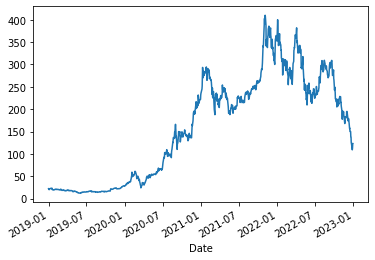

In [30]:
tesla['Close'].plot()
plt.show()

In [31]:
tickers=["NVDA","AAPL","WMT","XOM"]
df=pdr.get_data_yahoo(tickers, start='2011-01-01', end='2022-12-31')['Close']
df.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,NVDA,WMT,XOM
Date,,,,
2010-12-31,11.520000,3.8500,53.930000,73.120003
2011-01-03,11.770357,3.9550,54.560001,74.550003
2011-01-04,11.831786,3.9425,54.770000,74.900002
2011-01-05,11.928571,4.2450,54.410000,74.699997
2011-01-06,11.918929,4.8325,53.959999,75.180000


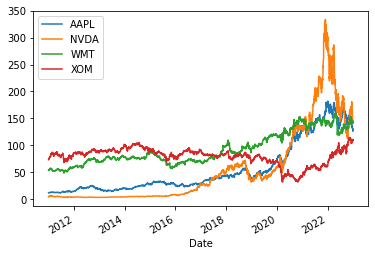

In [32]:
df.plot()
plt.show()

## How do you compute the return over the full sample ?

In [33]:
(df.iloc[-1]/df.iloc[0])-1

AAPL    10.278645
NVDA    36.958442
WMT      1.629149
XOM      0.508479
dtype: float64

In [34]:
(df.iloc[-1]/df.loc["2018-04-02"])-1

AAPL    2.118071
NVDA    1.644470
WMT     0.657393
XOM     0.506419
dtype: float64

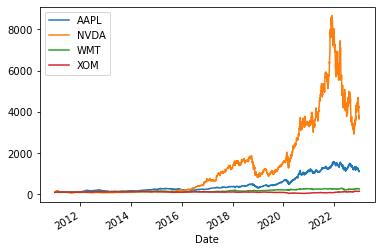

In [35]:
(df/df.iloc[0]*100).plot()
plt.show()

In [36]:
df.head()

,AAPL,NVDA,WMT,XOM
Date,,,,
2010-12-31,11.520000,3.8500,53.930000,73.120003
2011-01-03,11.770357,3.9550,54.560001,74.550003
2011-01-04,11.831786,3.9425,54.770000,74.900002
2011-01-05,11.928571,4.2450,54.410000,74.699997
2011-01-06,11.918929,4.8325,53.959999,75.180000


In [37]:
df_flat=df.unstack().reset_index()
df_flat.head()

,level_0,Date,0
0,AAPL,2010-12-31,11.520000
1,AAPL,2011-01-03,11.770357
2,AAPL,2011-01-04,11.831786
3,AAPL,2011-01-05,11.928571
4,AAPL,2011-01-06,11.918929


In [38]:
df_flat.columns=['Ticker','Date','Close']

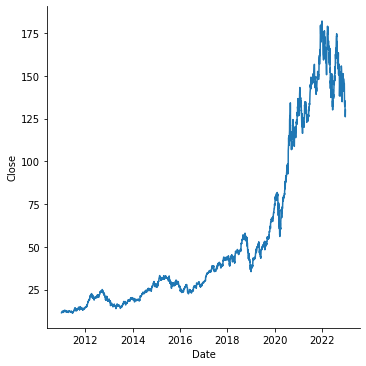

In [39]:
sns.relplot(x="Date", y="Close", kind="line", data=df_flat[df_flat["Ticker"]=="AAPL"])

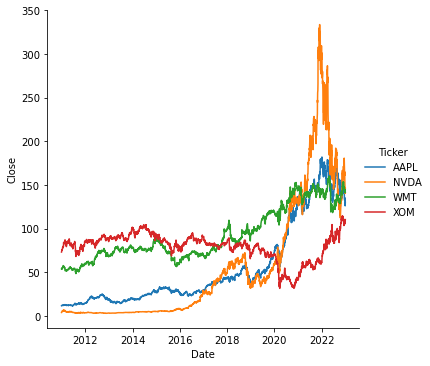

In [40]:
sns.relplot(x="Date", y="Close", kind="line", data=df_flat, hue="Ticker")

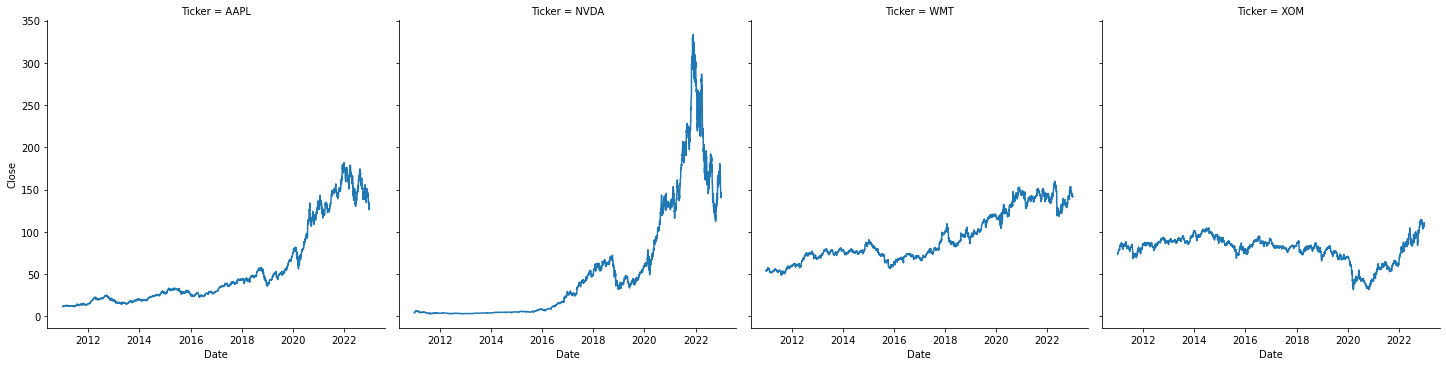

In [41]:
sns.relplot(x="Date", y="Close", kind="line", data=df_flat, col="Ticker")

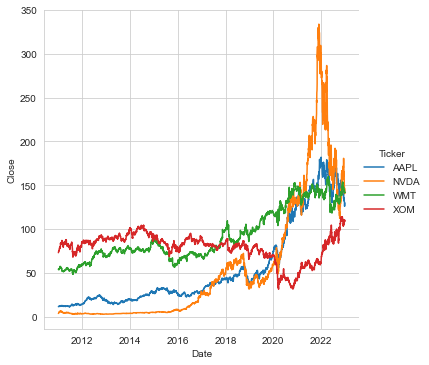

In [42]:
sns.set_style("whitegrid") #darkgrid, whitegrid, white, dark, ticks
sns.relplot(x="Date", y="Close", kind="line", data=df_flat, hue="Ticker")

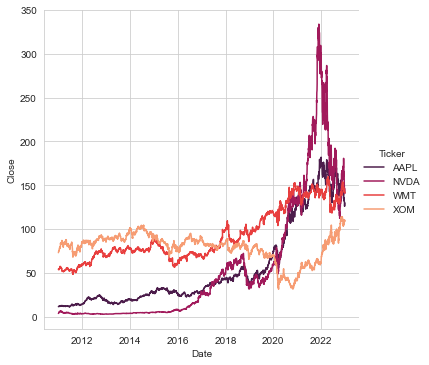

In [43]:
sns.relplot(x="Date", y="Close", kind="line", data=df_flat, hue="Ticker", palette="rocket")

In [44]:
colors=["#25D84B","#25CDD8","#9125D8","#D8255B"]
customPalette=sns.set_palette(sns.set_palette(colors))

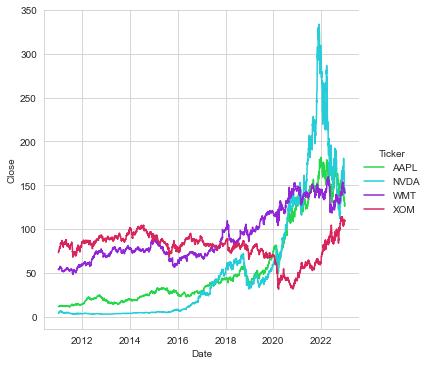

In [45]:
sns.relplot(x="Date", y="Close", kind="line", data=df_flat, hue="Ticker", palette=customPalette)

### Compute 10, 20, 30 days moving average prices for one of the stock in our dataframe

In [46]:
AAPL=df_flat[df_flat["Ticker"]=="AAPL"]

windows=[10,20,30]

for period in windows:
    column_name="MA for %s days" %(str(period))
    AAPL[column_name]=AAPL["Close"].rolling(period).mean()
    
AAPL.tail()

<ipython-input-46-2c7c9a5a5918>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL[column_name]=AAPL["Close"].rolling(period).mean()


,Ticker,Date,Close,MA for 10 days,MA for 20 days,MA for 30 days
3016,AAPL,2022-12-23,131.860001,136.839000,140.6610,143.646999
3017,AAPL,2022-12-27,130.029999,135.392999,139.9515,142.991332
3018,AAPL,2022-12-28,126.040001,133.449999,139.1950,142.249999
3019,AAPL,2022-12-29,129.610001,132.089999,138.2740,141.568999
3020,AAPL,2022-12-30,129.929993,131.432998,137.3550,140.940333


In [47]:
AAPL_flat=pd.melt(AAPL, id_vars=["Date", "Ticker"],
                 value_vars=["Close","MA for 10 days","MA for 20 days","MA for 30 days"])
AAPL_flat.tail()

,Date,Ticker,variable,value
12079,2022-12-23,AAPL,MA for 30 days,143.646999
12080,2022-12-27,AAPL,MA for 30 days,142.991332
12081,2022-12-28,AAPL,MA for 30 days,142.249999
12082,2022-12-29,AAPL,MA for 30 days,141.568999
12083,2022-12-30,AAPL,MA for 30 days,140.940333


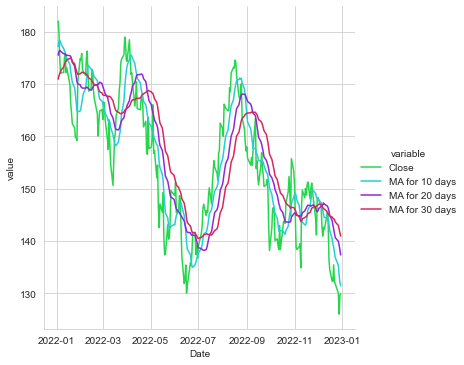

In [48]:
sns.relplot(x="Date", y="value", hue="variable", kind="line", data=AAPL_flat[AAPL_flat["Date"]>"2022-01-01"])

In [49]:
stock_ret=df.pct_change()
stock_ret.head()

,AAPL,NVDA,WMT,XOM
Date,,,,
2010-12-31,NaN,NaN,NaN,NaN
2011-01-03,0.021732,0.027273,0.011682,0.019557
2011-01-04,0.005219,-0.003161,0.003849,0.004695
2011-01-05,0.008180,0.076728,-0.006573,-0.002670
2011-01-06,-0.000808,0.138398,-0.008271,0.006426


In [50]:
stock_ret=stock_ret.reset_index()
stock_ret.head()

,Date,AAPL,NVDA,WMT,XOM
0,2010-12-31,NaN,NaN,NaN,NaN
1,2011-01-03,0.021732,0.027273,0.011682,0.019557
2,2011-01-04,0.005219,-0.003161,0.003849,0.004695
3,2011-01-05,0.008180,0.076728,-0.006573,-0.002670
4,2011-01-06,-0.000808,0.138398,-0.008271,0.006426


In [51]:
stock_ret_flat=pd.melt(stock_ret, id_vars=["Date"],
                 value_vars=["AAPL","NVDA","WMT","XOM"])
stock_ret_flat.head()

,Date,variable,value
0,2010-12-31,AAPL,NaN
1,2011-01-03,AAPL,0.021732
2,2011-01-04,AAPL,0.005219
3,2011-01-05,AAPL,0.008180
4,2011-01-06,AAPL,-0.000808


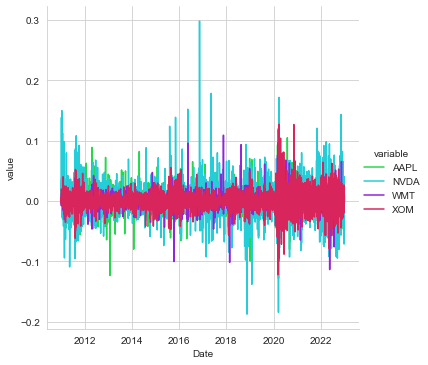

In [52]:
sns.relplot(x="Date", y="value", hue="variable", kind="line", data=stock_ret_flat)

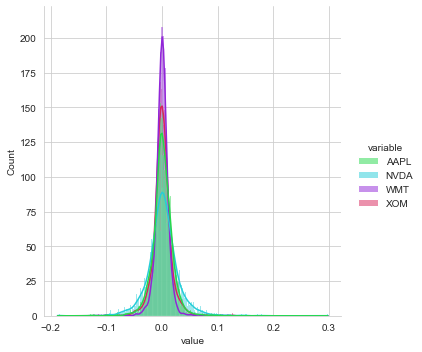

In [53]:
sns.displot(data=stock_ret_flat, x="value", hue="variable", kde=True)

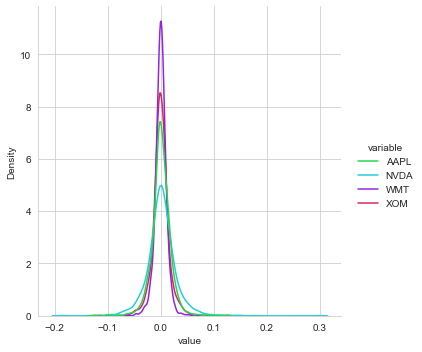

In [54]:
sns.displot(data=stock_ret_flat, x="value", hue="variable", kind="kde")

C:\Users\anoku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


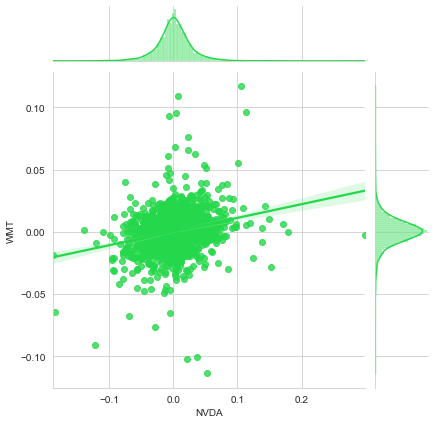

In [55]:
sns.jointplot('NVDA','WMT', stock_ret, kind="reg")

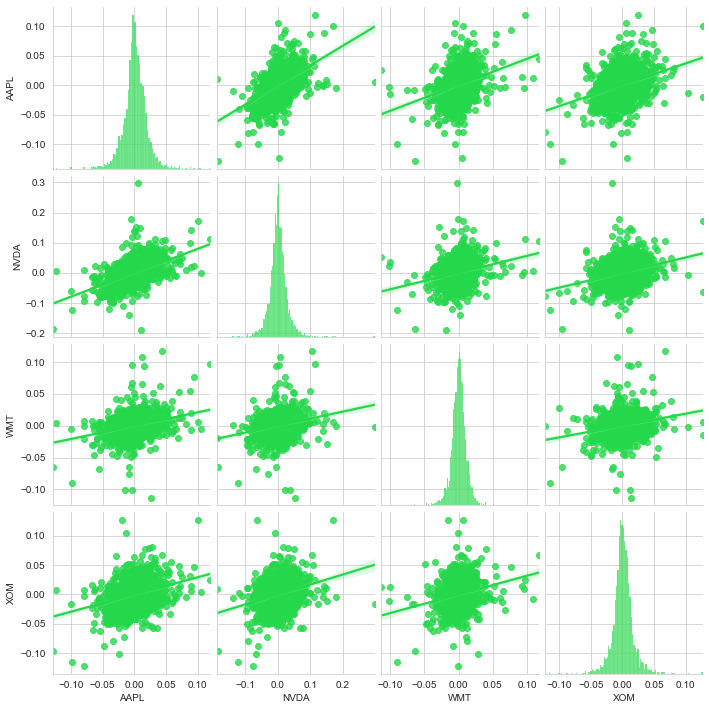

In [56]:
sns.pairplot( stock_ret, kind="reg")

In [57]:
stock_ret.corr()

,AAPL,NVDA,WMT,XOM
AAPL,1.000000,0.512873,0.304040,0.326012
NVDA,0.512873,1.000000,0.246686,0.290810
WMT,0.304040,0.246686,1.000000,0.243100
XOM,0.326012,0.290810,0.243100,1.000000


<AxesSubplot:>

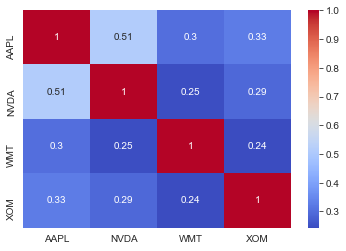

In [58]:

sns.heatmap(stock_ret.corr(), cmap="coolwarm", annot=True)

In [59]:
stock_ret=stock_ret.set_index("Date")

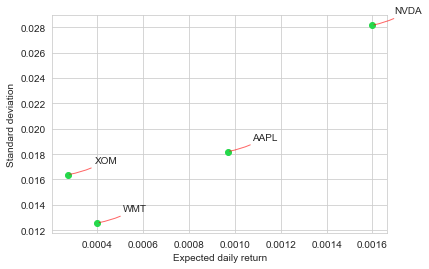

In [60]:

plt.scatter(stock_ret.mean(),stock_ret.std())
plt.xlabel('Expected daily return')
plt.ylabel('Standard deviation')

for label, x, y in zip (stock_ret.columns, stock_ret.mean(), stock_ret.std()):
    plt.annotate(
    label,
    xy=(x,y), xytext=(50,10),
    textcoords="offset points", ha="right", va="bottom",
    arrowprops=dict(arrowstyle="-", color="r", alpha=0.6,
                   connectionstyle="arc3, rad=-0.1"))

plt.savefig("risk-return.png", dpi=300)
plt.show()

### Write a function that computes Monte Carlo simulation for a stock using the GBM model

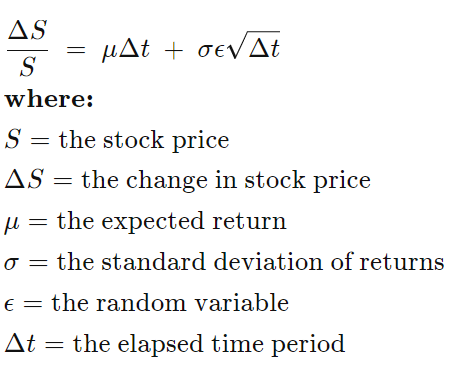

In [61]:
def mcmc(start_price, horizon, average, stdev):
    price=np.zeros(horizon)
    price[0]=start_price
    trend=np.zeros(horizon)
    shock=np.zeros(horizon)
    delta=1/horizon
    
    for x in range (1,horizon):
        shock[x]=gauss(average, stdev)
        trend[x]=average*delta
        price[x]=price[x-1]+(price[x-1]*(trend[x]+shock[x]))
    return price



In [62]:
start=AAPL["Close"].iloc[-1]
mu=AAPL["Close"].pct_change().mean()
sigma=AAPL["Close"].pct_change().std()
horizon=50

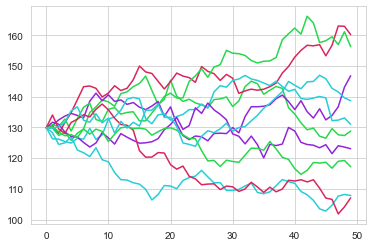

In [63]:
for run in range (10):
    plt.plot(mcmc(start, horizon, mu, sigma))

### Run 10000 simulations and plot the distribution of the final prices 

In [64]:
runs=10000
simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=mcmc(start, horizon, mu, sigma)[-1]

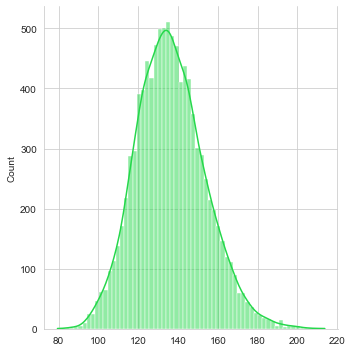

In [65]:
sns.displot(simulations, kde=True)

In [66]:
np.percentile(simulations, 5)

109.54307386369337

In [67]:
start-np.percentile(simulations, 5)

20.386918812087885

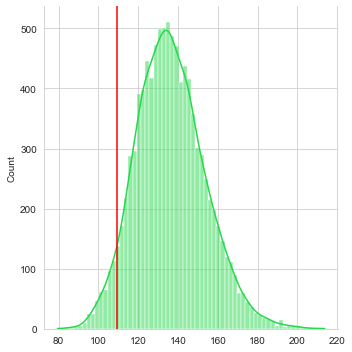

In [68]:
sns.displot(simulations, kde=True)
plt.axvline(x=np.percentile(simulations, 5), color='r')